In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.io
import os
import sys
from datetime import datetime, timedelta

In [2]:
# Add the library to the path
sys.path.append(r"C:\ERDC\BarSed")

# Import the library modules

from lib.data_classes.Run import Run
from lib.data_classes.WaveGauge import WaveGauge
from lib.data_classes.WaveMaker import WaveMaker

In [3]:
# Set the important paths
barsed_data_path = r"D:\ERDC\BarSed"

# Name of the folder containing the wave data
WG_data_folder_name = r"WG" 

# Path to where I'm storing the bathymetry data
WG_data_path = os.path.join(barsed_data_path, WG_data_folder_name)

print(f"Bathy file path: {WG_data_path}")

Bathy file path: D:\ERDC\BarSed\WG


In [4]:
# Run number
run_number = "082"

# Run id
run_id = f"RUN{run_number}"

# Mat file for the first run
run_001_name = r"{}.mat".format(run_id)

# Path to the first run
run_001_path = os.path.join(WG_data_path, run_001_name)

print("Run001 mat file path: {}".format(run_001_path))

Run001 mat file path: D:\ERDC\BarSed\WG\RUN082.mat


In [5]:
test_run = Run(id = run_id, wave_file_path=run_001_path)

In [6]:
test_run.load_wave_data()

New Number of 17 wave gauges


In [7]:
print(test_run)

id: RUN082
Start Date: 2015-01-30
Wave Data File path: D:\ERDC\BarSed\WG\RUN082.mat
Num pressure gagues: NoneNum advs: None


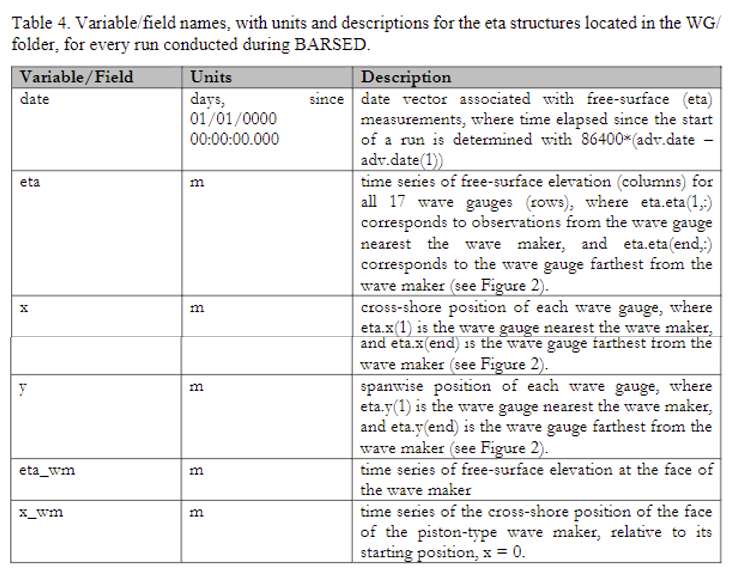

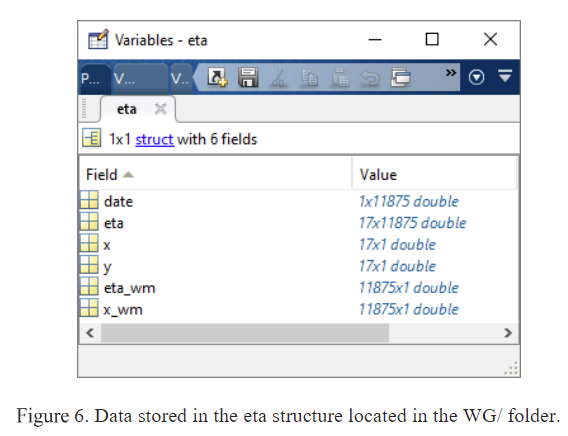

Notes on the Wave Gauges:

* There are a total of 17 wave gauges
* First 3 are self calibrating [0->2]
* Next 8 are fixed square wave gauges [3->10]
* Next 6 are ultrasonic wave gauges [11->16]

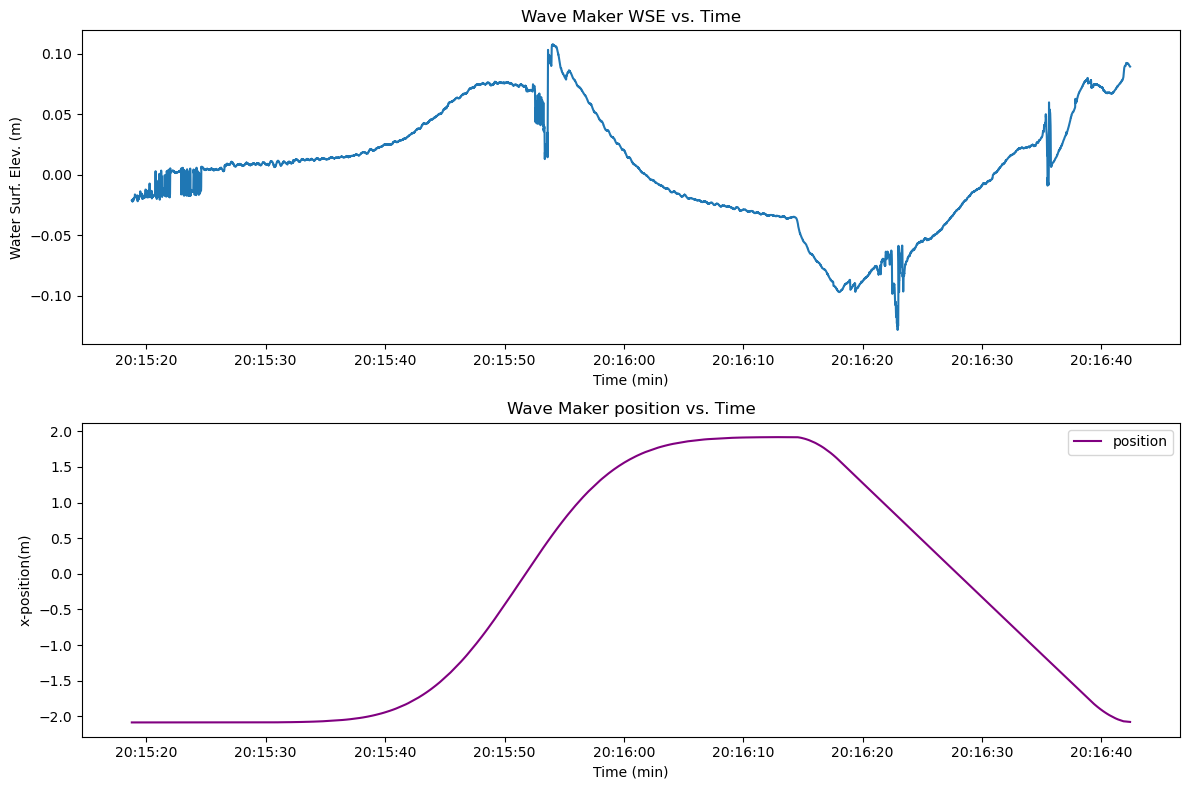

In [8]:
fig, axs = plt.subplots(nrows = 2, ncols = 1, figsize= (12, 8))

# Plot the water surface elevation in front of the wave maker
test_run.wave_maker.quick_wse_plot(axs = axs[0])
test_run.wave_maker.quick_position_plot(axs= axs[1], color = "purple", label ="position", legend = True)

plt.tight_layout()

In [9]:
# wse -> Water Surface Elevation

# Construct the wse elevation as mesured by the wave gauges 
# (doesn't include wave maker)
test_run.construct_wave_gauge_wse()

# Make an array of all the wave gauge locations
test_run.get_wave_gauge_locations()

# Construct the elevation of the flume as measured by the wave gauges and 
# the wave maker
test_run.construct_flume_wse()

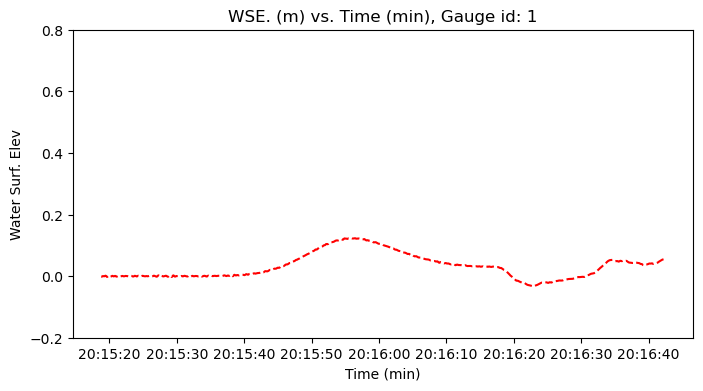

In [10]:
# Plot the wse. at a specific gauge for all time
test_run.wave_gauges[0].quick_plot(color=  "red", ylim= (-0.2, 0.8), linestyle = "--")

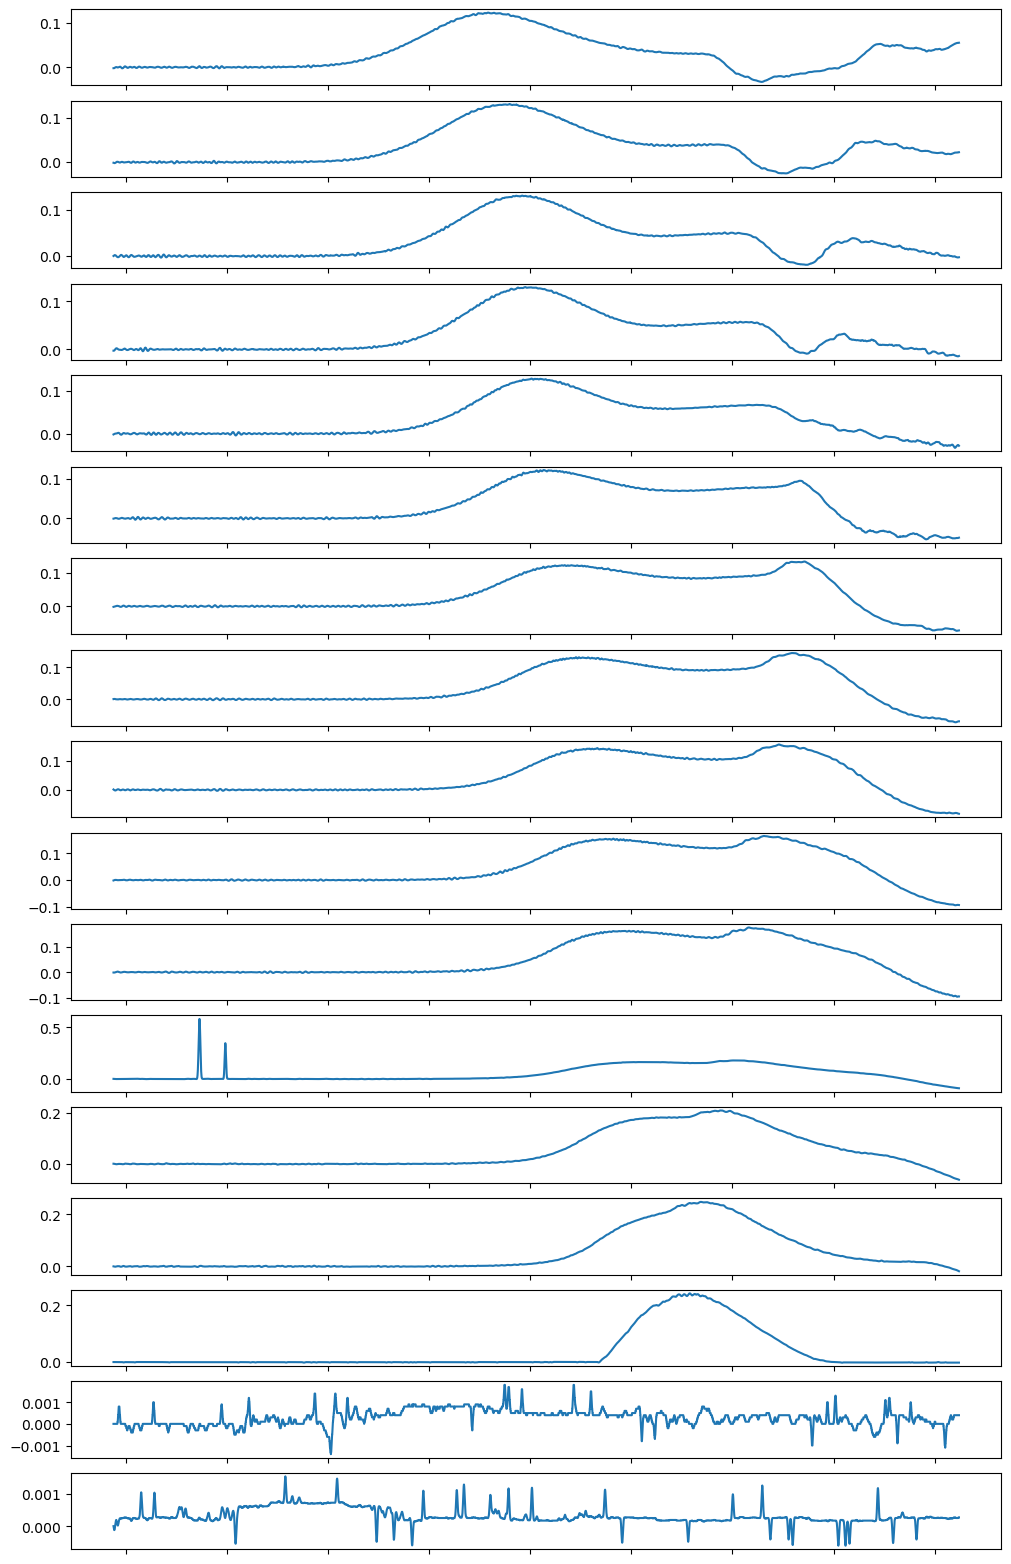

In [11]:
# Plot the wse at different gauges
gauge_ids= [val for val in range(1, 18)]
test_run.quick_plot_wave_gauges(gauge_ids= gauge_ids, xlabel = False, ylabel=False, figsize = (12, 20))

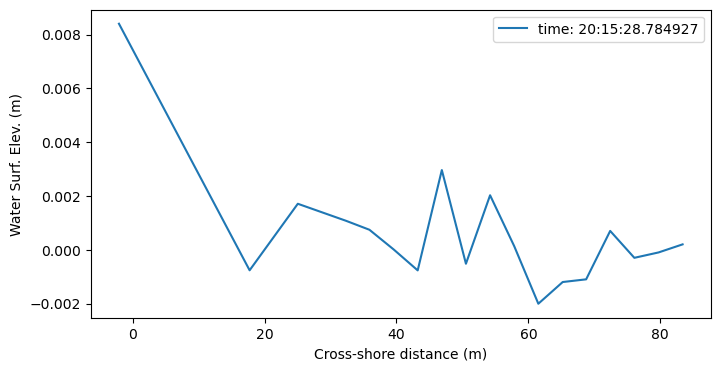

In [23]:
# Plot the wse across the whole flume including the wave maker
test_run.quick_flume_wse_plot(time_index = 1000, legend = True)

In [13]:
test_run.date_time[-1]

datetime.datetime(2015, 1, 30, 20, 16, 42, 394928)

In [14]:
for gauge in test_run.wave_gauges:
    print(gauge.location)

(17.728, -1.269)
(25.037, -1.271)
(32.342, -1.268)
(35.895, -1.383)
(39.556, -1.369)
(43.215, -1.374)
(46.876, -1.372)
(50.53, -1.366)
(54.192, -1.37)
(57.85, -1.37)
(61.509, -1.368)
(65.205, -1.327)
(68.759, -1.367)
(72.405, -1.359)
(76.068, -1.369)
(79.738, -1.355)
(83.385, -1.37)


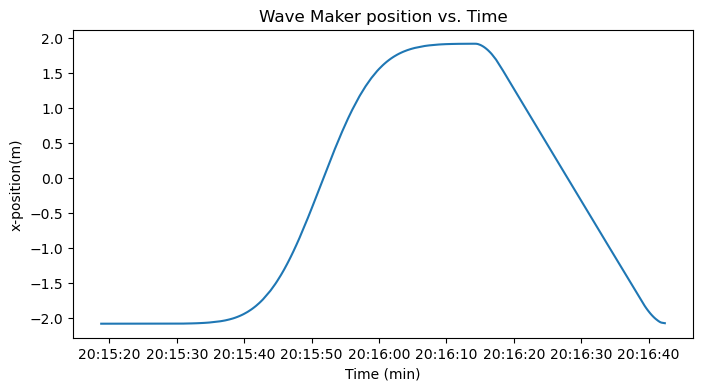

In [15]:
test_run.wave_maker.quick_position_plot()

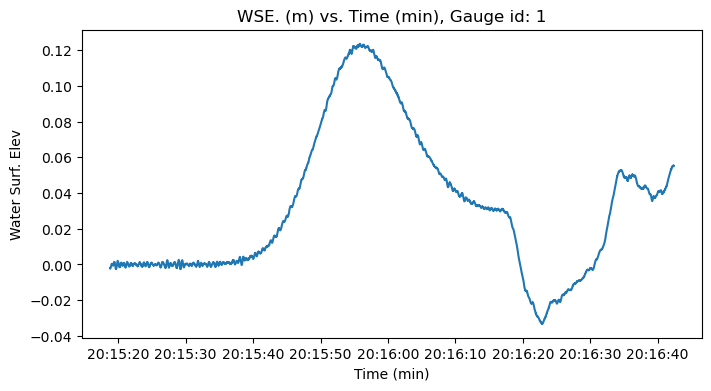

In [16]:
test_run.wave_gauges[0].quick_plot()

In [17]:
# Calc the 